# Freedom of Information Requests in the Region of Waterloo

The Waterloo Region strives to be open, transparent and accountable to citizens. Through a number of projects and initiatives, the Region is empowering citizens to become more engaged and to access government information. https://www.regionofwaterloo.ca/en/regional-government/open-government.aspx

One of those initiatives is *Open Data*. With this, the Region shares its data for everyone to use and republish with few restrictions. The data is provided in machine-readable format. 

While searching the Region's Open Data Portal, one finds the *Freedom of Information Requests* (*FOIR*) data set. This data set spans 18 years. https://rowopendata-rmw.opendata.arcgis.com/

So let's find what this set holds and see if one can use machine learning to predict the outcome of a request based on the decisions made between 1999 and 2016.

First, let's import few must have libraries for such task:

* pandas - to be able to work work dataframes
* matplot and seaborn - to make beautiful plots
* numpy - for scientific computing
* sys - can't remember what for, will find out!

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

#import sys

Files are named the same way, e.g., *Freedom_of_Information_Requests__1999.csv*, except that they have different years, from 1999 to 2016. So let's add them to a pandas dataframe.

In [8]:
counter = 0
year_first = 1999
year_last = 2016
df = {}    # Dataframe of dataframes
for y in range(year_first, year_last + 1):
    file = 'data/Freedom_of_Information_Requests__' + str(y) + '.csv'
    df[counter] = pd.read_csv(file, encoding = 'utf-8')
    counter += 1

In [9]:
# Number of files read and turned into dataframes
len(df)

18

Here is how the first few lines of the first file look like,

In [10]:
df[0].head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2


Let's find out if all the files have the same number of columns:

In [11]:
for y in range(0, len(df)):
    print(df[y].shape)

(27, 6)
(19, 6)
(25, 6)
(20, 6)
(24, 6)
(22, 6)
(22, 6)
(23, 6)
(24, 6)
(30, 6)
(39, 6)
(29, 6)
(43, 6)
(41, 6)
(33, 6)
(30, 6)
(43, 6)
(82, 6)


In [13]:
# Number of columns of the first file
df[0].shape[1]

6

While all the files have the same number of columns, it is possible that over the years, those columns would not be the same, that the structure of those files has changed. We need to veify that we can combine all those files into a single stacked dataframe.

In [14]:
# How does one get the name of the columns? Call df.columns.values
columnsNamesArr = df[0].columns.values
print(columnsNamesArr)
print(columnsNamesArr[5])

['Request_Number' 'Request_Type' 'Source' 'Summary_of_Request' 'Decision'
 'OBJECTID']
OBJECTID


In [21]:
# Start an array with the names of the columns for all the files.
columnsNamesArr = {}
for y in range(0, len(df)):
    columnsNamesArr[y] = df[y].columns.values

      

As an example of different, but not so different column names: 'Request_Number' vs 'Request_Number:'


In [44]:
# Find out if they have the same columns or not. 
for i in range(0, len(df) - 1):
    for j in range(0, df[0].shape[1]):
        assert columnsNamesArr[i][j] == columnsNamesArr[i + 1][j],\
        "The column names are different at (%d, %d) and (%d, %d): '%s' vs. '%s'" %\
        ( i, j, i + 1, j, columnsNamesArr[i][j], columnsNamesArr[i+1][j]) 
        

AssertionError: The column names are different at (14, 0) and (15, 0): 'Request_Number' vs. 'Request_Number:'

In [45]:
# Let's do the same, but this time, use all lower case, and strip spaces and colons.
for i in range(0, len(df) - 1):
    for j in range(0, df[0].shape[1]):
        assert columnsNamesArr[i][j].lower().strip(' :') == columnsNamesArr[i + 1][j].lower().strip(' :'), \
        "The column names are still different at (%d, %d) and (%d, %d): '%s' vs. '%s'" %\
        ( i, j, i + 1, j, columnsNamesArr[i][j], columnsNamesArr[i + 1][j])  
        

In [55]:
# As an example of what the sripping does:
i = 14
j = 0
print("The column name of (%d, %d) before .lower().strip(' :') is '%s', and after is '%s'." %\
        (i, j, columnsNamesArr[i][j], columnsNamesArr[i][j].lower().strip(' :')))

print("The column name of (%d, %d) before .lower().strip(' :') is '%s', and after is '%s'." %\
        (i + 1, j, columnsNamesArr[i + 1][j], columnsNamesArr[i + 1][j].lower().strip(' :')))

The column name of (14, 0) before .lower().strip(' :') is 'Request_Number', and after is 'request_number'.
The column name of (15, 0) before .lower().strip(' :') is 'Request_Number:', and after is 'request_number'.


In [41]:
df[0].columns.values[0]

'Request_Number'

Now that we know that all columns are the same, let's consolidate the names directly in the dataframe:

In [56]:
for i in range(0, 18):
    for j in range(0, df[0].shape[1]):
        df[i].columns.values[j] = df[i].columns.values[j].strip(' :')
        

In [57]:
# Check if it worked
i = 14
j = 0
print(df[i].columns.values[j])
print(df[i + 1].columns.values[j])

Request_Number
Request_Number


We can now proceed to concatenate the dataframes into a single one:

In [94]:
adf = pd.concat(df, ignore_index = True)

In [95]:
# Check shape
adf.shape

(576, 6)

In [96]:
adf.head(29)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,OBJECTID
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted,0
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed,1
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted,2
3,99004,General Information,Public,Public Health inspection records for {address ...,All disclosed,3
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All disclosed,4
5,99006,Personal Information,Public,Public Health inspection file for {name remove...,All disclosed,5
6,99007,General Information,Public,Scope of work and deliverables sections of con...,All disclosed,6
7,99008,General Information,Public,Number of contracts and dollar amount of contr...,Withdrawn,7
8,99009,Personal Information,Public,Public Health inspection report regarding a co...,All disclosed,8
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Withdrawn,9


In [97]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Request_Number        576 non-null int64
Request_Type          576 non-null object
Source                576 non-null object
Summary_of_Request    576 non-null object
Decision              576 non-null object
OBJECTID              576 non-null int64
dtypes: int64(2), object(4)
memory usage: 27.1+ KB


On further inspection, the OBJECTID column is just the order number in which the request arrived in a particular year, without any further meaning. So I will proceed to drop that column.

In [98]:
adf = adf.drop(columns = ['OBJECTID'])

In [99]:
adf.head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted


Before diving into the Machine Learning aspect of this, one needs to know the data better!

*Request_Number* has the file number, unique to each case. *Summary_of_Request* has, as the name says, the summarized version of the request, written by a clerck at the office. 

For the columns, *Request_Type*, *Source*, and *Decision*, it seems that we have a limited number of options, so let's see how many unique values they have.

Let's start with *Request_Type*:

In [100]:
adf.Request_Type.unique()

array(['General Information', 'Personal Information', 'Correction',
       'Personal Information/General Information',
       'Personal Health Information/General Information',
       'Personal Health Information',
       'Personal Health Information/General Informaiton',
       'General Records', 'Personal', 'General ',
       'Personal Health Information ', 'General', 'Personal '],
      dtype=object)

We see that given typos and extra white spaces, these categories can be combined. 

In [101]:
adf['Request_Type'] = adf['Request_Type'].str.strip()
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

10


General Information                                283
Personal Information                               110
General                                             76
Personal                                            47
General Records                                     36
Personal Health Information/General Information     16
Personal Health Information                          3
Correction                                           2
Personal Information/General Information             2
Personal Health Information/General Informaiton      1
Name: Request_Type, dtype: int64

In [102]:
adf['Request_Type'] = adf['Request_Type'].str.replace('Informaiton', 'Information')

On further inspection (see below), one finds out that the terminology evolved over time. For example, in the early years, it was called *General Information*, then later on it was called *General Records*, and nowadays, it is called just *General*. So I will proceed to combine those categories.

It is the same case for *Personal Information* and *Personal*. 

In [103]:
adf[(adf['Request_Type'] == 'General Information') | (adf['Request_Type'] == 'General Records')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted
3,99004,General Information,Public,Public Health inspection records for {address ...,All disclosed
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All disclosed
6,99007,General Information,Public,Scope of work and deliverables sections of con...,All disclosed
7,99008,General Information,Public,Number of contracts and dollar amount of contr...,Withdrawn
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Withdrawn
10,99011,General Information,Business,Complete fiscal year end vendor report for yea...,Partly non-existent
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Partly exempted


In [104]:
adf[(adf['Request_Type'] == 'General Information') | (adf['Request_Type'] == 'General')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General Information,Business,Minutes of Service Delivery Subcommittee of ES...,Partly exempted
1,99002,General Information,Business,Public Health inspection reports for the {loca...,All disclosed
2,99003,General Information,Business,Public Health inspection records for {location...,Partly exempted
3,99004,General Information,Public,Public Health inspection records for {address ...,All disclosed
4,99005,General Information,Business,Vendor list report with total of year-to-date ...,All disclosed
6,99007,General Information,Public,Scope of work and deliverables sections of con...,All disclosed
7,99008,General Information,Public,Number of contracts and dollar amount of contr...,Withdrawn
9,99010,General Information,Business,Phase I environmental site assessment regardin...,Withdrawn
10,99011,General Information,Business,Complete fiscal year end vendor report for yea...,Partly non-existent
12,99013,General Information,Individual by Agent,Rabies control records related to dog bite aff...,Partly exempted


In [105]:
adf[(adf['Request_Type'] == 'Personal Information') | (adf['Request_Type'] =='Personal')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
5,99006,Personal Information,Public,Public Health inspection file for {name remove...,All disclosed
8,99009,Personal Information,Public,Public Health inspection report regarding a co...,All disclosed
11,99012,Personal Information,Public,A complete copy of Income Maintenance client f...,All disclosed
13,99014,Personal Information,Public,Home Child Care Provider file for {name remove...,Partly exempted
15,99016,Personal Information,Public,Financial records documenting {name removed} e...,All disclosed
16,99017,Personal Information,Public,Minutes and notes relating to {name removed} m...,Partly exempted
20,99021,Personal Information,Public,{Name removed} personnel file for the period 1...,Withdrawn
21,99022,Personal Information,Public,"Complaint dated November 1, 1999 in {name remo...",Partly exempted
23,99024,Personal Information,Public,Home Child Care Provider file for {name remove...,Partly exempted
26,99027,Personal Information,Public,Complaint regarding alleged fraud accusation m...,Withdrawn


In [106]:
adf['Request_Type'] = adf['Request_Type'].str.replace('Personal Information', 'Personal')

In [107]:
adf['Request_Type'] = adf['Request_Type'].str.replace('General Information', 'General')

In [108]:
adf['Request_Type'] = adf['Request_Type'].str.replace('General Records', 'General')

In [109]:
print(adf.Request_Type.nunique())
adf.Request_Type.value_counts()

6


General                                395
Personal                               157
Personal Health Information/General     17
Personal Health Information              3
Personal/General                         2
Correction                               2
Name: Request_Type, dtype: int64

In [110]:
adf[(adf['Request_Type'] == 'Personal Health Information/General')
    | (adf['Request_Type'] =='Personal Health Information')
    | (adf['Request_Type'] =='Personal/General')]


,Request_Number,Request_Type,Source,Summary_of_Request,Decision
78,2002008,Personal/General,Individual by Agent,Rabies incident report records regarding May 2...,All disclosed
89,2002019,Personal/General,Individual by Agent,Food-borne illness incident records for {locat...,All disclosed
120,2004006,Personal Health Information/General,Public,Rabies control investigation from April 2003 r...,Partly exempted
127,2004013,Personal Health Information/General,Individual by Agent,Rabies control investigation file.,Partly exempted
152,2005016,Personal Health Information/General,Individual by Agent,Food premise inspections of {location removed}...,All disclosed
158,2005022,Personal Health Information/General,Individual by Agent,Rabies control investigation file regarding do...,Partly exempted
169,2006011,Personal Health Information,Public,Ambulance Call Report for Emergency Medical Se...,Withdrawn
177,2006019,Personal Health Information/General,Public,Rabies control investigation file.,All disclosed
182,2007001,Personal Health Information/General,Public,Public Health investigation file regarding e-c...,Partly exempted
186,2007005,Personal Health Information/General,Public,Public Health investigation records regarding ...,Partly exempted


While there may still be room to combine those categories even further, since *Personal Health Information/General* and *Personal Health Information* seem to involve cases of food-borne illnesses and rabies control investigations, I chose not to. 

This was given that if one takes a look at other requests involving the words *rabies* or *food borne* (see below), those requests turn out to be filed into other categories, such as general or personal. Whether there is a clear difference, or whether it depends on the clerk filing the request, it is unknown to me.

In [111]:
adf[(adf['Summary_of_Request'].str.contains('rabies')) | (adf['Summary_of_Request'].str.contains('Rabies'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
12,99013,General,Individual by Agent,Rabies control records related to dog bite aff...,Partly exempted
78,2002008,Personal/General,Individual by Agent,Rabies incident report records regarding May 2...,All disclosed
101,2003011,Personal,Individual by Agent,Rabies control records from an incident occurr...,Partly exempted
102,2003012,Personal,Individual by Agent,Rabies control records for incident that occur...,Forwarded out
112,2003022,General,Public,Rabies control investigation records regarding...,Partly exempted
120,2004006,Personal Health Information/General,Public,Rabies control investigation from April 2003 r...,Partly exempted
127,2004013,Personal Health Information/General,Individual by Agent,Rabies control investigation file.,Partly exempted
143,2005007,General,Individual by Agent,Owner name and address in rabies control inves...,Partly exempted
146,2005010,General,Business,Rabies control investigation file for incident...,Partly exempted
158,2005022,Personal Health Information/General,Individual by Agent,Rabies control investigation file regarding do...,Partly exempted


In [112]:
adf[(adf['Summary_of_Request'].str.contains('Food-borne')) 
    | (adf['Summary_of_Request'].str.contains('Food borne'))
    | (adf['Summary_of_Request'].str.contains('food borne'))
    | (adf['Summary_of_Request'].str.contains('food-borne'))]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
31,2000005,Personal,Public,Public Health Inspection reports about food-bo...,Partly exempted
32,2000006,General,Public,Public Health Inspection report dated March 20...,All disclosed
34,2000008,Personal,Public,Public Health Inspection reports and laborator...,Partly exempted
89,2002019,Personal/General,Individual by Agent,Food-borne illness incident records for {locat...,All disclosed
94,2003004,Personal,Individual by Agent,Records regarding alleged food borne illness a...,All disclosed
129,2004015,Personal,Individual by Agent,Food-borne illness incident records from {loca...,All disclosed
152,2005016,Personal Health Information/General,Individual by Agent,Food premise inspections of {location removed}...,All disclosed
185,2007004,General,Business by Agent,Food-borne illness investigation at {company r...,All disclosed
190,2007009,Personal Health Information/General,Individual by Agent,Food borne illness investigation at {location ...,No record exists
201,2007020,General,Business by Agent,Food-borne illness complaint investigation reg...,Partly exempted


How about the *Source* column?

In [113]:
adf['Source'] = adf['Source'].str.strip()
print(adf.Source.nunique())
adf.Source.value_counts()

8


Business                    198
Public                      132
Individual by Agent         107
Individual by agent          59
Individual                   40
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

In [114]:
adf['Source'] = adf['Source'].str.replace('Individual by agent', 'Individual by Agent')

Again, is Source Public == Source Individual? I think so. Pre-2015, there were no *Individual* requests, just *Public*. Post-2015, there are no *Public* requests, just *Individual*.

In [115]:
adf[(adf['Source'] == 'Public') | (adf['Source'] == 'Individual')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
3,99004,General,Public,Public Health inspection records for {address ...,All disclosed
5,99006,Personal,Public,Public Health inspection file for {name remove...,All disclosed
6,99007,General,Public,Scope of work and deliverables sections of con...,All disclosed
7,99008,General,Public,Number of contracts and dollar amount of contr...,Withdrawn
8,99009,Personal,Public,Public Health inspection report regarding a co...,All disclosed
11,99012,Personal,Public,A complete copy of Income Maintenance client f...,All disclosed
13,99014,Personal,Public,Home Child Care Provider file for {name remove...,Partly exempted
15,99016,Personal,Public,Financial records documenting {name removed} e...,All disclosed
16,99017,Personal,Public,Minutes and notes relating to {name removed} m...,Partly exempted
18,99019,General,Public,List of all radio frequencies used by Region o...,Forwarded out


In [116]:
adf['Source'] = adf['Source'].str.replace('Public', 'Individual')

In [117]:
print(adf.Source.nunique())
adf.Source.value_counts()

6


Business                    198
Individual                  172
Individual by Agent         166
Media                        20
Business by Agent            19
Individual for dependant      1
Name: Source, dtype: int64

Let's look at the *Decision* column.

In [118]:
adf['Decision'] = adf['Decision'].str.strip()
print(adf.Decision.nunique())
adf.Decision.value_counts()

21


All disclosed                                      160
Partly exempted                                    102
Withdrawn                                           79
No records exist                                    51
Information disclosed in part                       50
Partly non-existent                                 23
Nothing disclosed                                   20
All Information disclosed                           16
No record exists                                    15
Abandoned                                           13
All information disclosed                           13
Forwarded out                                       12
No responsive records exist                         11
Non-existent                                         3
Transferred to Region of Waterloo Public Health      2
Correction granted                                   1
Request withdrawn                                    1
No additional records exist                          1
Correction

We will again merge categories.

In [119]:
adf['Decision'] = adf['Decision'].str.replace('All disclosed', 'All information disclosed')

In [120]:
adf['Decision'] = adf['Decision'].str.replace('All Information disclosed', 'All information disclosed')

In [121]:
adf['Decision'] = adf['Decision'].str.replace('Nothing disclosed', 'No information disclosed')

In [122]:
adf['Decision'] = adf['Decision'].str.replace('Withdrawn', 'Request withdrawn')

In [123]:
adf['Decision'] = adf['Decision'].str.replace('No record exists', 'No records exist')

In [124]:
adf['Decision'] = adf['Decision'].str.replace('No responsive records exist', 'No records exist')

In [125]:
adf['Decision'] = adf['Decision'].str.replace('Non-existent', 'No records exist')

In [126]:
adf['Decision'] = adf['Decision'].str.replace('Forwarded out', 'Transferred')

In [127]:
adf['Decision'] = adf['Decision'].str.replace('Transferred to Region of Waterloo Public Health', 'Transferred')

In [128]:
# Up to 2015, it was called Partly exempted, now it is known as 'Information disclosed in part'
adf['Decision'] = adf['Decision'].str.replace('Partly exempted', 'Information disclosed in part')

In [129]:
adf[(adf['Decision'] == 'No additional records exist')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
520,2016027,General,Individual,Follow up to request 2016018 for 1) Traffic S...,No additional records exist


In [130]:
print(adf.Decision.nunique())
adf.Decision.value_counts()

11


All information disclosed        189
Information disclosed in part    152
Request withdrawn                 80
No records exist                  80
Partly non-existent               23
No information disclosed          21
Transferred                       15
Abandoned                         13
Correction granted                 1
Correction refused                 1
No additional records exist        1
Name: Decision, dtype: int64

As one can see, of the 576 requests, information was not disclosed for only 21. This is a highly imbalanced case. So, before taking another approach, such as condensing all the categories into one of three (fully, partially, and nothing disclosed), I would like to take a deeper look at the data as is. 

For example, let's see the distribution based on who is making the request.

In [132]:
# By making use of the groupby() function, one can come up with a table. For example, if the source is 'Business':
adf_business_groupby_Decision = adf[adf['Source'] == 'Business'].groupby('Decision')\
                                      .count()[['Source']]
adf_business_groupby_Decision



,Source
Decision,
Abandoned,3
All information disclosed,64
Information disclosed in part,36
No information disclosed,2
No records exist,43
Partly non-existent,10
Request withdrawn,38
Transferred,2


In [133]:
# As for all the 576 decisions
adf_groupbyDecision = adf.groupby('Decision').count()[['Source']]
adf_groupbyDecision

,Source
Decision,
Abandoned,13
All information disclosed,189
Correction granted,1
Correction refused,1
Information disclosed in part,152
No additional records exist,1
No information disclosed,21
No records exist,80
Partly non-existent,23


In [134]:
# Defining the columns as the unique type of decisions possible
columns = []

for i in range(0,adf.Decision.nunique()):
    columns.append(adf.Decision.unique()[i])

print(len(columns))
print(columns)
print(columns[0])

11
['Information disclosed in part', 'All information disclosed', 'Request withdrawn', 'Partly non-existent', 'Transferred', 'No records exist', 'No information disclosed', 'Correction refused', 'Correction granted', 'Abandoned', 'No additional records exist']
Information disclosed in part


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

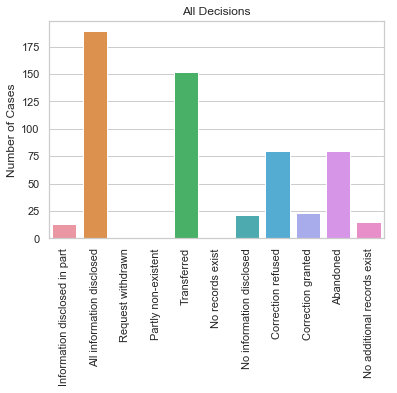

In [135]:
# Bar plot of all decisions made
sns.set(style = "whitegrid")
ax = sns.barplot(x = columns, y = 'Source', data = adf_groupbyDecision)
ax.set(ylabel = 'Number of Cases', title = 'All Decisions')
plt.xticks(rotation = 90)


In [139]:
# Let's create a matrix of Decision vs Source

# Source Type:
# Business                    198 
# Individual                  172 
# Individual by Agent         166 
# Media                        20 
# Business by Agent            19 
# Individual for dependant      1

df_byDecision = {}

source_types = []
for i in range (0, len(adf.Source.unique())):
    source_types.append(adf.Source.unique()[i])

decision_types = []
for i in range (0, len(adf.Decision.unique())):
    decision_types.append(adf.Decision.unique()[i])

counter = 0

for source in source_types:
    temp_df = adf[adf['Source'] == source].groupby('Decision').count()[['Source']]
    df_byDecision[counter] = temp_df.T    # Transpose
    if len(df_byDecision[counter].columns) != len(decision_types):
        for column in decision_types:
            if column not in df_byDecision[counter].columns:
                df_byDecision[counter][column] = 0

    df_byDecision[counter].rename(index = {'Source':source}, inplace = True)
    df_byDecision[counter].rename
    counter += 1
    
#print(len(df_byDecision))

df_byDecision = pd.concat(df_byDecision, sort = True)

df_byDecision


,,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
0,Business,3,64,0,0,36,0,2,43,10,38,2
1,Individual,5,56,1,1,45,1,10,14,9,23,7
2,Individual by Agent,4,63,0,0,56,0,1,20,3,13,6
3,Business by Agent,0,4,0,0,6,0,2,2,0,5,0
4,Media,0,2,0,0,9,0,6,1,1,1,0
5,Individual for dependant,1,0,0,0,0,0,0,0,0,0,0


In [140]:
df_byDecision.index

MultiIndex(levels=[[0, 1, 2, 3, 4, 5], ['Business', 'Business by Agent', 'Individual', 'Individual by Agent', 'Individual for dependant', 'Media']],
           labels=[[0, 1, 2, 3, 4, 5], [0, 2, 3, 1, 5, 4]])

In [141]:
# Resetting index to be the Source
df_byDecision= df_byDecision.reset_index(level=0, drop=True)

In [143]:
df_byDecision.index

Index(['Business', 'Individual', 'Individual by Agent', 'Business by Agent',
       'Media', 'Individual for dependant'],
      dtype='object')

In [142]:
df_byDecision

,Abandoned,All information disclosed,Correction granted,Correction refused,Information disclosed in part,No additional records exist,No information disclosed,No records exist,Partly non-existent,Request withdrawn,Transferred
Business,3,64,0,0,36,0,2,43,10,38,2
Individual,5,56,1,1,45,1,10,14,9,23,7
Individual by Agent,4,63,0,0,56,0,1,20,3,13,6
Business by Agent,0,4,0,0,6,0,2,2,0,5,0
Media,0,2,0,0,9,0,6,1,1,1,0
Individual for dependant,1,0,0,0,0,0,0,0,0,0,0


In [94]:
df_byDecision.columns

Index(['Abandoned', 'All information disclosed', 'Correction granted',
       'Correction refused', 'Information disclosed in part',
       'No additional records exist', 'No information disclosed',
       'No records exist', 'Partly non-existent', 'Request withdrawn',
       'Transferred'],
      dtype='object')

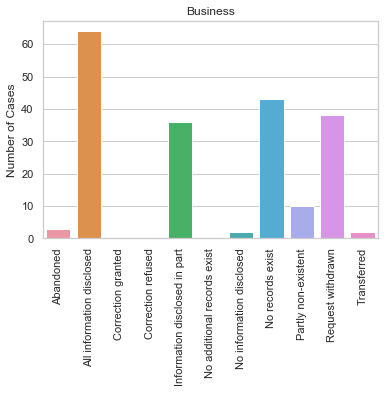

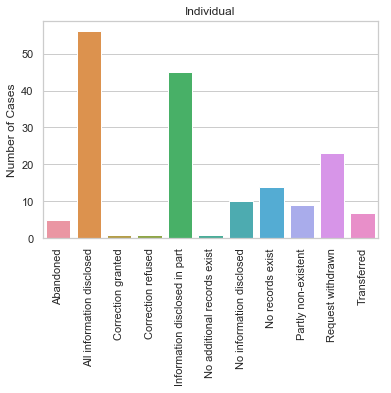

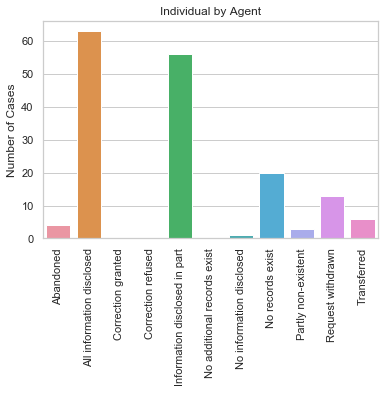

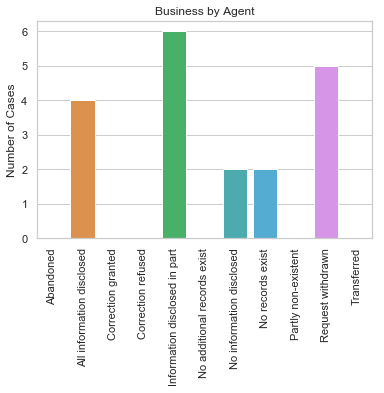

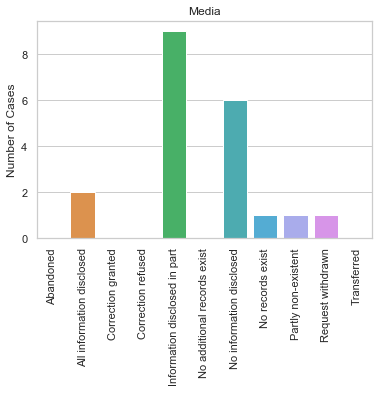

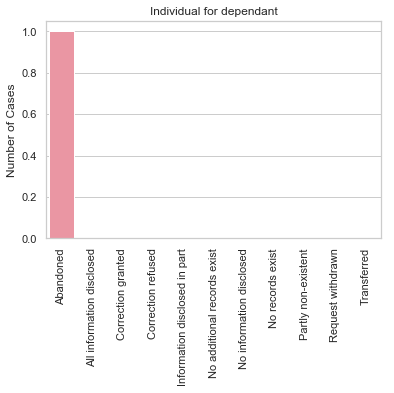

In [145]:
# Visualizing the data just obtained, for each of the sources

counter = 0

for source in source_types:
    sns.set(style = "whitegrid")
    # ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
    ax = sns.barplot(data = df_byDecision[counter: counter + 1])
    ax.set(ylabel = 'Number of Cases', title = source)
    plt.xticks(rotation = 90)
    plt.show()
    counter += 1
    

Another approach could be to drop the columns where there is no decision made. Meaning, when it is not on the hands of the person granting a decision, such as a request withdrawn or abandoned. It is important to note that the subset is still unbalanced.

In [146]:
sub_df_byDecision = df_byDecision.drop(columns=['Abandoned', 'Correction granted', 'Correction refused',
                                                'No additional records exist', 'No records exist', 
                                                'Partly non-existent', 'Request withdrawn', 'Transferred'])


In [154]:
sub_df_byDecision

,All information disclosed,Information disclosed in part,No information disclosed
Business,64,36,2
Individual,56,45,10
Individual by Agent,63,56,1
Business by Agent,4,6,2
Media,2,9,6
Individual for dependant,0,0,0


In [156]:
# Normalizing the subset by row
norm_sub_df_byDecision = sub_df_byDecision.div(sub_df_byDecision.sum(axis = 1), axis = 0)
norm_sub_df_byDecision

,All information disclosed,Information disclosed in part,No information disclosed
Business,0.627451,0.352941,0.019608
Individual,0.504505,0.405405,0.090090
Individual by Agent,0.525000,0.466667,0.008333
Business by Agent,0.333333,0.500000,0.166667
Media,0.117647,0.529412,0.352941
Individual for dependant,NaN,NaN,NaN


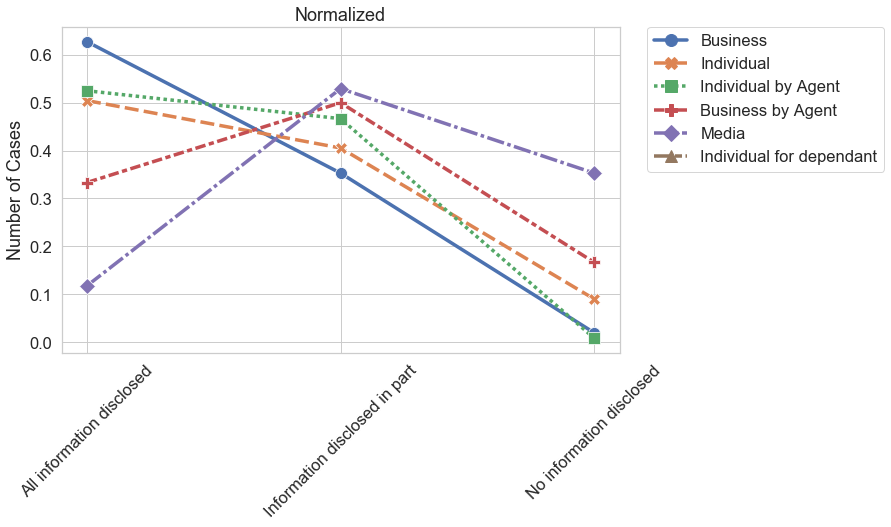

In [157]:
# And plotting it
plt.figure(figsize = (10, 6))
#sns.set(style="whitegrid")
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 3.5, "lines.markersize":12.0})
ax = sns.lineplot(data = norm_sub_df_byDecision.T, markers = True)
ax.set(ylabel = 'Number of Cases', title = 'Normalized')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)



There are some interesting features in this plot. 

- Business get the most cases where the information is fully disclosed and the least with no disclosed information.
- Media is the other way around. 
- Individuals by Agent fare better than individuals without one, however, the opposite is true for business by agents.



# NLP

Now we proceed to analize the actual *Summary_of_Requests*. For this, we turn to Natural Language Processing libraries, such as NLTK and spaCy, and the help of sklearn.

Broadly generalizing, there are few steps one needs to do before analyzing any text:
- Tokenize the text: Break the text in single words, i.e., tokens.
- Remove any unwanted characters, such as returns (\n), and punctuation, such as "-", "...", "”".
- Remove URLs or replace them by a word, say, "URL".
- Remove screen names or replace the '@' by a word, say, "screen_name".
- Remove capitalization of words.
- Remove words with less than 4 characters.
- Remove "stopwords", i.e., the most common words in a language. These words probably won't help classifying our text, examples are articles such as , 'a', 'the', 'and'. There is no single universal list of stop words.
- Lemmatization, which is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

In [213]:
import string
import re
import spacy
import nltk

from spacy.lang.en import English
parser = English()
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet as wn

# To make word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# look at the most common item in a list
from collections import Counter

In [159]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bertaerodriguez-
[nltk_data]     milla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "``"]

In [108]:
'''
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens
'''

In [110]:
'''
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens
'''

In [188]:
def tokenizeText(sample):
    lda_tokens = []
    tokens = parser(sample)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token) 
    lemmas = []
    for tok in lda_tokens:    # spaCy lemmatization
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    lda_tokens = lemmas    
    lda_tokens = [tok for tok in lda_tokens if len(tok) > 3]
    lda_tokens = [tok for tok in lda_tokens if tok not in STOPLIST]
    lda_tokens = [tok for tok in lda_tokens if tok not in SYMBOLS]
    return lda_tokens

In [189]:
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    return text

In [190]:
# NLTK lemma
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    

In [191]:
def prepare_text_for_lda(text):
    text = cleanText(text)
    tokens = tokenizeText(text)
    #tokens = [get_lemma(token) for token in tokens]
    return tokens

In [192]:
all_text = adf['Summary_of_Request']
print(all_text[:10])
print("No. of requests %d" % len(all_text))

0    Minutes of Service Delivery Subcommittee of ES...
1    Public Health inspection reports for the {loca...
2    Public Health inspection records for {location...
3    Public Health inspection records for {address ...
4    Vendor list report with total of year-to-date ...
5    Public Health inspection file for {name remove...
6    Scope of work and deliverables sections of con...
7    Number of contracts and dollar amount of contr...
8    Public Health inspection report regarding a co...
9    Phase I environmental site assessment regardin...
Name: Summary_of_Request, dtype: object
No. of requests 576


With the purpose of finding out which are the most common words (unigrams) and phrases consisting of 2, 3, or n-words (bigrams, trigrams, and n-grams), it is easier if one combines all the words into a single string.

In [193]:
# Merging all the requests into a single line
all_text_merged = 'a'

for lines in range(0,len(all_text)):
    all_text_merged = all_text_merged + ' ' + all_text[lines]

In [194]:
print(all_text_merged)

a Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999. Public Health inspection reports for the {location removed}, Kitchener for the past 3 years. Public Health inspection records for {location removed}, Cambridge for the past 2 years. Public Health inspection records for {address removed}, Cambridge, relating to sink odours in 1994. Vendor list report with total of year-to-date purchases at fiscal year end for 1996, 1997, and 1998. Public Health inspection file for {name removed} at {location removed} regarding requester's dismissal from employment. Scope of work and deliverables sections of contract between Region of Waterloo and {company name removed} for Waterloo Regional Master Transportation Plan. Number of contracts and dollar amount of contracts between Region of Waterloo and {company name removed} for the last 5 years. Public Health inspection report regarding a complaint about contamination found in coffee cup at {location remo

In [208]:
# Preparing text and getting unigrams
tokens = prepare_text_for_lda(all_text_merged)
unigrams = tokens

In [212]:
print(unigrams[:25])
print("No. of unigrams %d" % len(unigrams))

['minutes', 'service', 'delivery', 'subcommittee', 'escac', 'period', 'january', '1997', 'january', '1999', 'public', 'health', 'inspection', 'report', 'location', 'remove', 'kitchener', 'past', 'year', 'public', 'health', 'inspection', 'record', 'location', 'remove']
No. of unigrams 6013


In [199]:
bigrams = nltk.bigrams(unigrams)
trigrams = nltk.trigrams(unigrams)

unigrams_counter = Counter(unigrams)
bigrams_counter = Counter(bigrams)
trigrams_counter = Counter(trigrams)

In [216]:
print("No. of unique unigrams: %d" % len(unigrams_counter))
for unigram in unigrams_counter.most_common(10):
    print(unigram)

No. of unique unigrams: 1147
('remove', 284)
('file', 150)
('removed}.', 123)
('address', 123)
('ontario', 121)
('waterloo', 119)
('environmental', 115)
('copy', 110)
('site', 110)
('assessment', 107)


In [217]:
print("No. of unique bigrams: %d" % len(bigrams_counter))
for bigram in bigrams_counter.most_common(10):
    print(bigram)

No. of unique bigrams: 3420
(('address', 'remove'), 112)
(('ontario', 'works'), 102)
(('environmental', 'site'), 98)
(('site', 'assessment'), 97)
(('phase', 'environmental'), 97)
(('assessment', 'address'), 83)
(('copy', 'ontario'), 81)
(('complete', 'copy'), 78)
(('file', 'removed}.'), 77)
(('client', 'file'), 71)


In [218]:
print("No. of unique trigrams: %d" % len(trigrams_counter))
for trigram in trigrams_counter.most_common(10):
    print(trigram)

No. of unique trigrams: 4316
(('environmental', 'site', 'assessment'), 97)
(('phase', 'environmental', 'site'), 96)
(('site', 'assessment', 'address'), 82)
(('assessment', 'address', 'remove'), 80)
(('copy', 'ontario', 'works'), 79)
(('complete', 'copy', 'ontario'), 72)
(('ontario', 'works', 'client'), 67)
(('works', 'client', 'file'), 66)
(('client', 'file', 'removed}.'), 55)
(('address', 'remove', 'kitchener'), 36)


Visualizing the word cloud with a maximum of 100 words

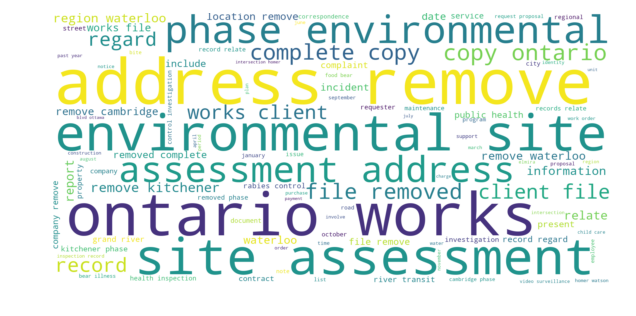

In [219]:
wordcloud1 = WordCloud(
                stopwords = STOPLIST,
                background_color = 'white',
                width = 2000,
                height = 1000,
                max_words = 100
             ).generate(" ".join(unigrams))
plt.figure(figsize = (10,5))
plt.imshow(wordcloud1, interpolation = "bilinear", aspect = 'auto')
plt.axis('off')
plt.show()

And with no collocations, this is, with no bigrams, we get something that features the word "remove" quite prominently.

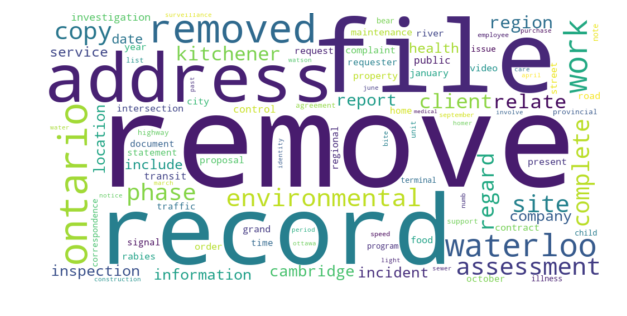

In [220]:
wordcloud2 = WordCloud(
                stopwords = STOPLIST,
                background_color = 'white',
                width = 1000,
                height = 500,
                collocations = False,
                max_words = 100
             ).generate(" ".join(unigrams))
plt.figure(figsize = (10,5))
plt.imshow(wordcloud2, interpolation = "bilinear", aspect = 'auto')
plt.axis('off')
plt.show()

So, why is the work remove so important? It turns out, many of these request have names or people or locations that need to be removed for privacy reasons. So, let's reprocess the text taking this into account by using regular expressions.

In [252]:
# {address removed}, {name removed} {names removed} {location removed} {company name removed}
# {intersection removed}
# {request number removed}

new_stop_words = []
regex_phrase = r'(?:\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\}|\(\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\}|\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\)|\(\w+\s*removed\)|\{\w+\s*\w*\s*\w*\s*\w*\s*\w*\s*\w*\{)'
matches = re.findall(regex_phrase, all_text_merged)
for match in matches:
    print(match)
    new_stop_words.append(match)
    

{location removed}
{location removed}
{address removed}
{name removed}
{location removed}
{company name removed}
{company name removed}
{location removed}
{addresses removed}
{name removed}
{names removed}
{name removed}
{location removed}
{name removed}
{name removed}
{Name removed}
{name removed}
{name removed{
{name removed}
{name removed}
{location removed}
{name removed}
{location removed}
{location removed}
{name removed}
{date removed}
{name removed}
{addresses removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{names removed}
{names removed}
{locations removed}
{location removed}
{company name removed}
{name removed}
{name removed}
{name removed}
{company name removed}
{locations removed}
{address removed}
{name removed}
{location removed}
{names removed}
{names removed}
{intersection removed}
{location removed}
{company name removed}
{name removed}
{name removed}
(name removed}
(name removed}
{name removed}
{name removed}
{name removed}
{name removed}

In [253]:
#print(new_stop_words)
new_stop_words = set(new_stop_words)
#print(new_stop_words)
new_stop_words = list(new_stop_words)
#print(new_stop_words[0])
#new_stop_words[0] = new_stop_words[0].replace('\'','')
print(new_stop_words)

['{intersection removed}', '{business removed}', '{organization name removed}', '{Name removed}', '{name and position removed}', '{individual by agent}', '{addresses removed}', '{names removed}', '(name removed}', '{company name and address removed}', '{facility removed}', '(name removed)', '{address}', '{address removed}', '{companies removed}', '{name removed{', '{restaurant removed}', '{date removed}', '{street name removed}', '{company name removed}', '(location removed)', '{restaurant name removed}', '{location removed}', '{orgnization name removed}', '{company removed}', '{developer removed}', '(address removed}', '{request number removed}', '{Company name removed}', '{company names removed}', '{name removed}', '{locations removed}', '{institutions removed}']


In [254]:
len(new_stop_words)  ## 33!

33

In [225]:
new_stop_words[1]

'{business removed}'

In [226]:
str(new_stop_words[1])

'{business removed}'

In [134]:
#all_text_merged_removed = all_text_merged.replace(r'\{\w+\s*\w*\}', '')

In [135]:
all_text_merged_removed = all_text_merged
for stop in new_stop_words:
    print(stop)
    all_text_merged_removed = all_text_merged_removed.replace(stop, '')

{Name removed}
{restaurant removed}
{intersection removed}
{street name removed}
{addresses removed}
(name removed)
{locations removed}
{organization name removed}
{company removed}
{location removed}
{company name and address removed}
{names removed}
{Company name removed}
{request number removed}
{individual by agent}
{orgnization name removed}
{name and position removed}
{company name removed}
{companies removed}
{company names removed}
{name removed}
{restaurant name removed}
{developer removed}
{address removed}
{name removed{
{facility removed}
{address}
(address removed}
{institutions removed}
{business removed}
(location removed)
{date removed}
(name removed}


In [136]:
all_text_merged_removed

'a Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999. Public Health inspection reports for the , Kitchener for the past 3 years. Public Health inspection records for , Cambridge for the past 2 years. Public Health inspection records for , Cambridge, relating to sink odours in 1994. Vendor list report with total of year-to-date purchases at fiscal year end for 1996, 1997, and 1998. Public Health inspection file for  at  regarding requester\'s dismissal from employment. Scope of work and deliverables sections of contract between Region of Waterloo and  for Waterloo Regional Master Transportation Plan. Number of contracts and dollar amount of contracts between Region of Waterloo and  for the last 5 years. Public Health inspection report regarding a complaint about contamination found in coffee cup at , Cambridge. Phase I environmental site assessment regarding sewer use at . Complete fiscal year end vendor report for years 1996 to 1998 and

In [137]:
tokens_rm = prepare_text_for_lda(all_text_merged_removed)
unigrams_rm = tokens_rm
bigrams_rm = nltk.bigrams(unigrams_rm)
trigrams_rm = nltk.trigrams(unigrams_rm)

unigrams_counter_rm = Counter(unigrams_rm)
bigrams_counter_rm = Counter(bigrams_rm)
trigrams_counter_rm = Counter(trigrams_rm)

In [138]:
print(len(unigrams_counter_rm))
print('\n')
for unigram in unigrams_counter_rm.most_common(20):
    print(unigram)

1016


('record', 136)
('ontario', 121)
('waterloo', 119)
('environmental', 115)
('assessment', 108)
('works', 102)
('phase', 99)
('complete', 97)
('regard', 89)
('client', 77)
('relate', 73)
('kitchener', 70)
('region', 60)
('report', 51)
('cambridge', 46)
('information', 42)
('inspection', 39)
('include', 37)
('incident', 37)
('health', 35)


In [139]:
print(len(bigrams_counter_rm))
print('\n')
for bigram in bigrams_counter_rm.most_common(20):
    print(bigram)

2859


(('ontario', 'works'), 102)
(('environmental', 'assessment'), 99)
(('phase', 'environmental'), 97)
(('complete', 'ontario'), 84)
(('works', 'client'), 67)
(('region', 'waterloo'), 45)
(('record', 'relate'), 30)
(('assessment', 'kitchener'), 30)
(('record', 'regard'), 29)
(('public', 'health'), 26)
(('assessment', 'waterloo'), 25)
(('assessment', 'cambridge'), 22)
(('river', 'transit'), 21)
(('grand', 'river'), 21)
(('kitchener', 'phase'), 20)
(('rabies', 'control'), 19)
(('health', 'inspection'), 16)
(('client', 'complete'), 14)
(('control', 'investigation'), 14)
(('works', 'complete'), 13)


In [140]:
print(len(trigrams_counter_rm))
print('\n')
for trigram in trigrams_counter_rm.most_common(20):
    print(trigram)

3526


(('phase', 'environmental', 'assessment'), 96)
(('complete', 'ontario', 'works'), 82)
(('ontario', 'works', 'client'), 67)
(('environmental', 'assessment', 'kitchener'), 30)
(('environmental', 'assessment', 'waterloo'), 22)
(('environmental', 'assessment', 'cambridge'), 22)
(('grand', 'river', 'transit'), 21)
(('kitchener', 'phase', 'environmental'), 20)
(('assessment', 'kitchener', 'phase'), 18)
(('public', 'health', 'inspection'), 16)
(('rabies', 'control', 'investigation'), 14)
(('client', 'complete', 'ontario'), 14)
(('works', 'client', 'complete'), 14)
(('ontario', 'works', 'complete'), 13)
(('waterloo', 'phase', 'environmental'), 13)
(('assessment', 'waterloo', 'phase'), 11)
(('works', 'complete', 'ontario'), 11)
(('cambridge', 'phase', 'environmental'), 11)
(('assessment', 'cambridge', 'phase'), 10)
(('works', 'client', 'phase'), 10)


In [144]:
everygrams_rm = nltk.everygrams(unigrams_rm, min_len=4, max_len=4)
everygrams_counter_rm = Counter(everygrams_rm)
print(len(everygrams_counter_rm))
print('\n')
for everygram in everygrams_counter_rm.most_common(20):
    print(everygram)

3829


(('complete', 'ontario', 'works', 'client'), 51)
(('phase', 'environmental', 'assessment', 'kitchener'), 30)
(('phase', 'environmental', 'assessment', 'waterloo'), 22)
(('phase', 'environmental', 'assessment', 'cambridge'), 22)
(('kitchener', 'phase', 'environmental', 'assessment'), 20)
(('assessment', 'kitchener', 'phase', 'environmental'), 18)
(('environmental', 'assessment', 'kitchener', 'phase'), 18)
(('client', 'complete', 'ontario', 'works'), 14)
(('ontario', 'works', 'client', 'complete'), 14)
(('works', 'client', 'complete', 'ontario'), 14)
(('waterloo', 'phase', 'environmental', 'assessment'), 13)
(('complete', 'ontario', 'works', 'complete'), 12)
(('ontario', 'works', 'complete', 'ontario'), 11)
(('works', 'complete', 'ontario', 'works'), 11)
(('environmental', 'assessment', 'waterloo', 'phase'), 11)
(('cambridge', 'phase', 'environmental', 'assessment'), 11)
(('assessment', 'waterloo', 'phase', 'environmental'), 11)
(('ontario', 'works', 'client', 'phase'), 10)
(('env

In [311]:
everygrams_rm_5 = nltk.everygrams(unigrams_rm, min_len=4, max_len=5)
everygrams_counter_rm_5 = Counter(everygrams_rm_5)
print(len(everygrams_counter_rm_5))
print('\n')
for everygram in everygrams_counter_rm_5.most_common(20):
    print(everygram)

7835


(('complete', 'ontario', 'works', 'client'), 51)
(('phase', 'environmental', 'assessment', 'kitchener'), 30)
(('phase', 'environmental', 'assessment', 'cambridge'), 22)
(('phase', 'environmental', 'assessment', 'waterloo'), 22)
(('kitchener', 'phase', 'environmental', 'assessment'), 20)
(('assessment', 'kitchener', 'phase', 'environmental'), 18)
(('environmental', 'assessment', 'kitchener', 'phase'), 18)
(('phase', 'environmental', 'assessment', 'kitchener', 'phase'), 18)
(('environmental', 'assessment', 'kitchener', 'phase', 'environmental'), 18)
(('assessment', 'kitchener', 'phase', 'environmental', 'assessment'), 18)
(('works', 'client', 'complete', 'ontario'), 14)
(('works', 'client', 'complete', 'ontario', 'works'), 14)
(('client', 'complete', 'ontario', 'works'), 14)
(('ontario', 'works', 'client', 'complete', 'ontario'), 14)
(('complete', 'ontario', 'works', 'client', 'complete'), 14)
(('ontario', 'works', 'client', 'complete'), 14)
(('waterloo', 'phase', 'environmental',

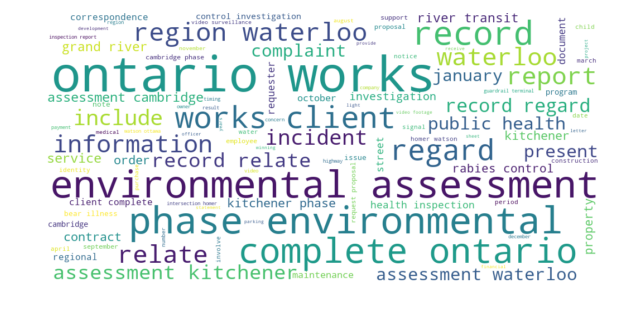

In [141]:
wordcloud3 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                max_words=100
            ).generate(" ".join(unigrams_rm))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud3, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

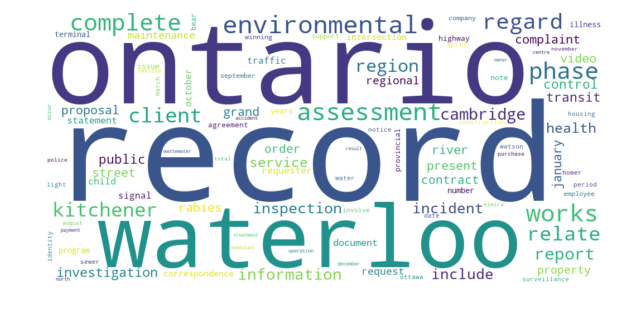

In [142]:
wordcloud4 = WordCloud(
                stopwords=STOPLIST,
                background_color='white',
                width=1000,
                height=500,
                collocations=False,
                max_words=100
            ).generate(" ".join(unigrams_rm))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud4, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

In [146]:
everygrams_array = everygrams_counter_rm.most_common(30)

In [147]:
len(everygrams_array)

30

In [148]:
len(everygrams_array[0])

2

In [149]:
len(everygrams_array[0][0])

4

In [150]:
everygrams_array[0]

(('complete', 'ontario', 'works', 'client'), 51)

In [151]:
all_text[0]

'Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999.'

In [152]:
num_words = Counter(all_text[0])
num_words

Counter({' ': 16,
         ',': 2,
         '.': 1,
         '1': 4,
         '3': 1,
         '7': 1,
         '9': 5,
         'A': 1,
         'C': 2,
         'D': 1,
         'E': 1,
         'J': 2,
         'M': 1,
         'S': 3,
         'a': 4,
         'b': 1,
         'c': 2,
         'd': 1,
         'e': 8,
         'f': 4,
         'i': 5,
         'l': 1,
         'm': 2,
         'n': 3,
         'o': 7,
         'p': 1,
         'r': 6,
         's': 1,
         't': 4,
         'u': 4,
         'v': 2,
         'y': 3})

In [153]:
print(len(all_text[0].split()))

17


In [154]:
len(all_text)

576

In [155]:
num_words = []
counter = 0

for index in range(0, len(all_text)):
    num_words.append(len(all_text[index]))
    if len(all_text[index]) > 500:
        counter+=1
        print(all_text[index] + "\nNumber of words: " + str(len(all_text[index])) + "\n\n")
print(counter)


1. A copy of the successful proposal in response to the RFP C2014-39 for Tender Preparation, Contract Administration and Construction Inspection Services for the Construction of the Waterloo Spur Line Trail from Regina Street in the City of Waterloo to Ahrens Street in the City of Kitchener issued by the Regional Municipality of Waterloo on October 15, 2014.� Please exclude any promotional material that may have been submitted with the proposal and may be considered proprietary. 2. The total number of submissions and the dollar value of the top three submissions for RFP C2014-39.
Number of words: 586


1) Records for the past two years up to most current for the inspection, testing and maintaining of the traffic control signal system sub-systems at the intersection of Homer Watson Blvd. and Ottawa St. pursuant to "ONTARIO REGULATION 239/02 MINIMUM MAINTENANCE STANDARDS FOR MUNICIPAL HIGHWAYS", section 14 subsection (1).  2) Records for the past two years up to most current for the insp

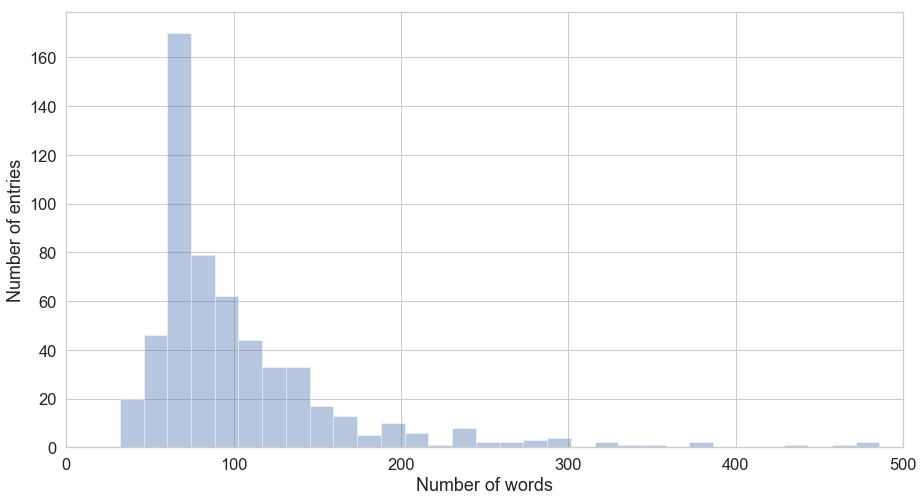

In [156]:
#sns.distplot(num_words, bins=100, kde=False);
plt.figure(figsize=(15,8))
plt.xlim(0, 500)
plt.xlabel('Number of words')
plt.ylabel('Number of entries')
sns.distplot(num_words, bins=100, kde=False);

In [157]:
# Looking at acceptance rates based on the following phrases
# environmental assessment
# ontario works
# grand river transit
# public health - inspection
# rabies - control investigation
# Find "adf_groupbyDecision" for each phrase, normalize


In [158]:
#adf_groupbyDecision = adf.groupby('Decision').count()[['Source']]
adf_groupbyDecision

,Source
Decision,
Abandoned,13
All information disclosed,189
Correction granted,1
Correction refused,1
Information disclosed in part,152
No additional records exist,1
No information disclosed,21
No records exist,80
Partly non-existent,23


In [159]:
adf.head(3)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part


In [160]:
# Create new df with tokenized, etc. text in summary of request

In [161]:
tokenized_adf = adf.copy()

In [162]:
tokenized_adf['Summary_of_Request'][0]

'Minutes of Service Delivery Subcommittee of ESCAC for period of January 1, 1997 to January 13, 1999.'

In [163]:
test = tokenized_adf['Summary_of_Request'][0]
token_test = prepare_text_for_lda(test)
print(token_test)
re_test = "".join([" "+i if not i.startswith("'") and i not in string.punctuation 
                   else i for i in token_test]).strip()
print(re_test)



['minutes', 'service', 'delivery', 'subcommittee', 'escac', 'period', 'january', 'january']
minutes service delivery subcommittee escac period january january


In [164]:
new_col = []
for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Summary_of_Request'][index]
    for stop in new_stop_words:
        if stop in current_line:
            current_line = current_line.replace(stop, '')
    line_tokens = prepare_text_for_lda(current_line)

    rejoined_text =  "".join([" "+i if not i.startswith("'") and i not in string.punctuation 
                              else i for i in line_tokens]).strip()
    new_col.append(rejoined_text)

In [165]:
tokenized_adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed


In [166]:
tokenized_adf['Edited_Summary'] = new_col

In [167]:
tokenized_adf.head(14)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener years
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge years
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...
4,99005,General,Business,Vendor list report with total of year-to-date ...,All information disclosed,vendor report total purchase fiscal
5,99006,Personal,Individual,Public Health inspection file for {name remove...,All information disclosed,public health inspection regard requester dism...
6,99007,General,Individual,Scope of work and deliverables sections of con...,All information disclosed,scope deliverable section contract region wate...
7,99008,General,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,number contract dollar contract region waterlo...
8,99009,Personal,Individual,Public Health inspection report regarding a co...,All information disclosed,public health inspection report regard complai...
9,99010,General,Business,Phase I environmental site assessment regardin...,Request withdrawn,phase environmental assessment regard sewer


In [168]:
# work, list, home, dog, copy, in stopwords?

In [169]:
# Looking at acceptance rates based on the following phrases
# environmental assessment
# ontario works
# grand river transit
# public health - inspection
# rabies - control investigation

list_commom_phrases = {'environmental assessment', 'ontario works', 
                       'grand river transit', 'public health', 'rabies'}



In [170]:
print(adf.Decision.unique())

['Information disclosed in part' 'All information disclosed'
 'Request withdrawn' 'Partly non-existent' 'Transferred'
 'No records exist' 'No information disclosed' 'Correction refused'
 'Correction granted' 'Abandoned' 'No additional records exist']


In [171]:
print(adf.Decision.unique()[0])

Information disclosed in part


In [172]:
counter_rows = np.append(adf.Decision.unique(), 'All')
counter_rows

array(['Information disclosed in part', 'All information disclosed',
       'Request withdrawn', 'Partly non-existent', 'Transferred',
       'No records exist', 'No information disclosed',
       'Correction refused', 'Correction granted', 'Abandoned',
       'No additional records exist', 'All'], dtype=object)

In [173]:
counter_df = pd.DataFrame(0, index = counter_rows, columns = list_commom_phrases)


In [174]:
counter_df

,ontario works,grand river transit,environmental assessment,public health,rabies
Information disclosed in part,0,0,0,0,0
All information disclosed,0,0,0,0,0
Request withdrawn,0,0,0,0,0
Partly non-existent,0,0,0,0,0
Transferred,0,0,0,0,0
No records exist,0,0,0,0,0
No information disclosed,0,0,0,0,0
Correction refused,0,0,0,0,0
Correction granted,0,0,0,0,0
Abandoned,0,0,0,0,0


In [175]:
for index in range(0, len(tokenized_adf)):
    current_line = tokenized_adf['Edited_Summary'][index]
    current_decision = tokenized_adf['Decision'][index]
    for phrase in list_commom_phrases:
        if phrase in current_line:
            counter_df[phrase]['All'] = counter_df[phrase]['All'] + 1
            counter_df[phrase][current_decision] = counter_df[phrase][current_decision] + 1
    


In [176]:
#counter_df['rabies']['All'] = counter_df['rabies']['All'] + 1

In [177]:
counter_df

,ontario works,grand river transit,environmental assessment,public health,rabies
Information disclosed in part,31,4,4,14,16
All information disclosed,41,10,26,7,4
Request withdrawn,10,1,22,2,0
Partly non-existent,5,0,7,0,0
Transferred,1,0,0,2,1
No records exist,11,0,40,1,0
No information disclosed,0,0,0,0,0
Correction refused,0,0,0,0,0
Correction granted,0,0,0,0,0
Abandoned,3,2,0,0,0


In [178]:
counter_df_Dec = counter_df.drop('All')

In [179]:
counter_df_Dec_byDecision = counter_df_Dec.div(counter_df_Dec.sum(axis=0), axis=1)
counter_df_Dec_byDecision

,ontario works,grand river transit,environmental assessment,public health,rabies
Information disclosed in part,0.303922,0.235294,0.040404,0.538462,0.761905
All information disclosed,0.401961,0.588235,0.262626,0.269231,0.190476
Request withdrawn,0.098039,0.058824,0.222222,0.076923,0.000000
Partly non-existent,0.049020,0.000000,0.070707,0.000000,0.000000
Transferred,0.009804,0.000000,0.000000,0.076923,0.047619
No records exist,0.107843,0.000000,0.404040,0.038462,0.000000
No information disclosed,0.000000,0.000000,0.000000,0.000000,0.000000
Correction refused,0.000000,0.000000,0.000000,0.000000,0.000000
Correction granted,0.000000,0.000000,0.000000,0.000000,0.000000
Abandoned,0.029412,0.117647,0.000000,0.000000,0.000000


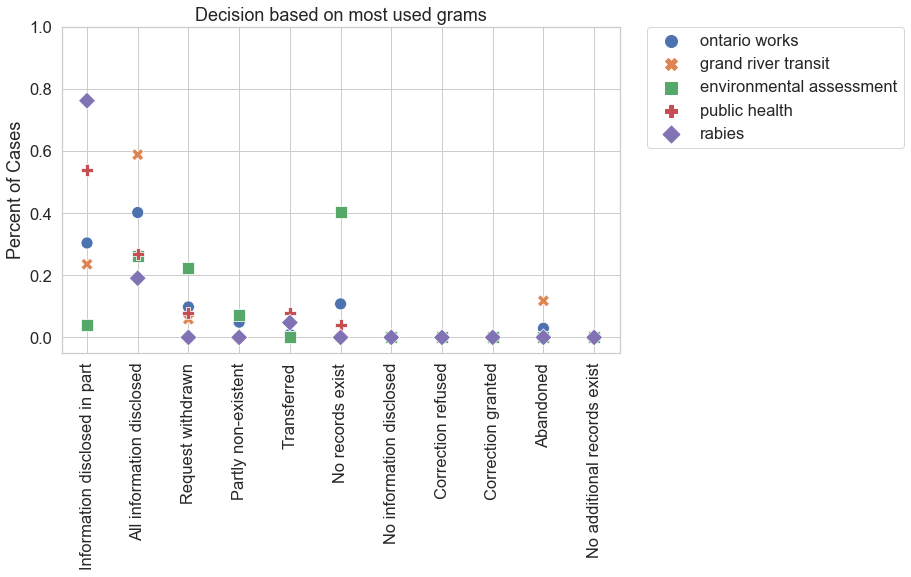

In [180]:
plt.figure(figsize=(10, 6))
#sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "lines.markersize":12.0})
# ax = sns.barplot(x = df_byDecision.columns, y = df_byDecision.loc[ 'Business' , : ], data = df_byDecision)
ax = sns.scatterplot(data = counter_df_Dec_byDecision, markers=True)
ax.set(ylabel = 'Percent of Cases', title = 'Decision based on most used grams', ylim = (-0.05,1))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

In [181]:
test_counter_df = counter_df_Dec_byDecision.copy()

In [182]:
test_counter_df = test_counter_df.replace(0.0, 'NaN')

In [183]:
test_counter_df

,ontario works,grand river transit,environmental assessment,public health,rabies
Information disclosed in part,0.303922,0.235294,0.040404,0.538462,0.761905
All information disclosed,0.401961,0.588235,0.262626,0.269231,0.190476
Request withdrawn,0.0980392,0.0588235,0.222222,0.0769231,NaN
Partly non-existent,0.0490196,NaN,0.0707071,NaN,NaN
Transferred,0.00980392,NaN,NaN,0.0769231,0.047619
No records exist,0.107843,NaN,0.40404,0.0384615,NaN
No information disclosed,NaN,NaN,NaN,NaN,NaN
Correction refused,NaN,NaN,NaN,NaN,NaN
Correction granted,NaN,NaN,NaN,NaN,NaN
Abandoned,0.0294118,0.117647,NaN,NaN,NaN


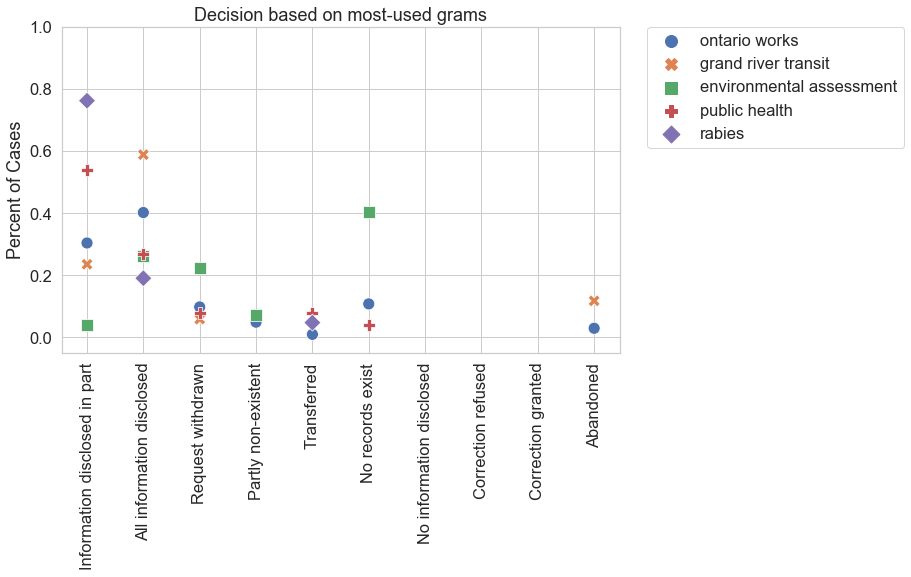

In [184]:
plt.figure(figsize=(10, 6))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5, "lines.markersize":12.0})
#sns.set_context("notebook", font_scale=1.5, rc={ "lines.markersize":12.0})
ax1 = sns.scatterplot(data = test_counter_df, markers=True)
ax1.set(ylabel = 'Percent of Cases', title = 'Decision based on most-used grams', ylim = (-0.05,1))
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.)

ML!

In [185]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [322]:
import mlxtend
from sklearn import tree
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

import scikitplot as skplt

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [186]:
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}

In [288]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
count_clf = LinearSVC()
tfidf_clf = LinearSVC()

In [188]:
count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

In [189]:
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [194]:
y = tokenized_adf['Decision']

In [195]:
X1 = tokenized_adf['Edited_Summary']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=2018)

In [197]:
len(X1_train), len (y1_train)

(385, 385)

In [198]:
X1_train.sample(5)

203    closure information regional highway kitchener...
227    allegation statement requester supply party in...
516    health department record property locate bisho...
225    details region waterloo monitoring wells drill...
74     identity company pay 250,000 sewer surcharge v...
Name: Edited_Summary, dtype: object

In [199]:
count_pipe.fit(X1_train, y1_train)
count_preds = count_pipe.predict(X1_test)
print("Accuracy:", accuracy_score(y1_test, count_preds))


Accuracy: 0.41361256544502617


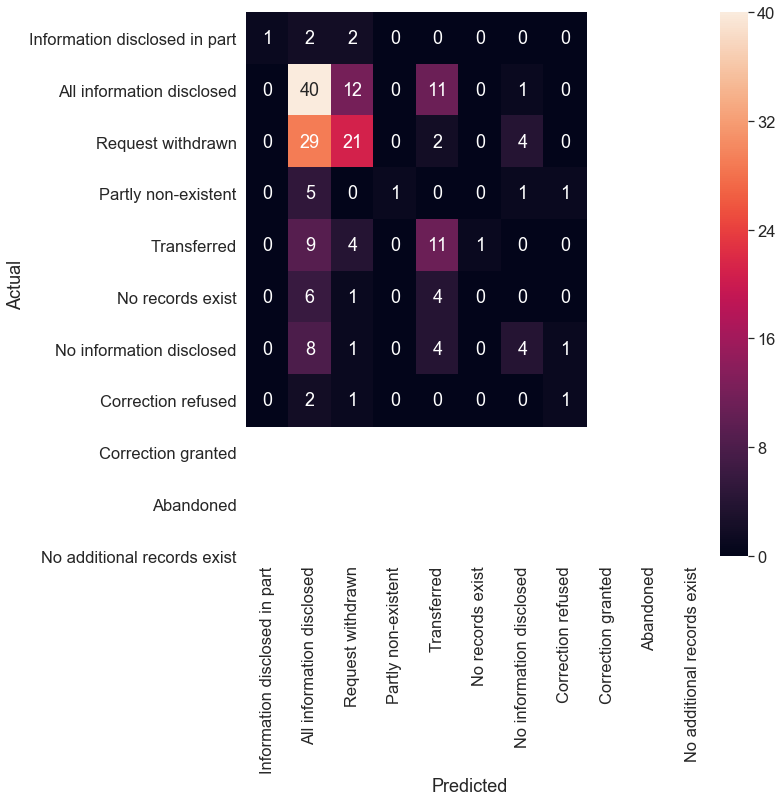

In [200]:
count_conf_mat = confusion_matrix(y1_test, count_preds) 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(count_conf_mat, annot=True, fmt='d',
            xticklabels=tokenized_adf['Decision'].unique(), yticklabels=tokenized_adf['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [201]:
tfidf_pipe.fit(X1_train, y1_train)

Pipeline(memory=None,
     steps=[('cleanText', <__main__.CleanTextTransformer object at 0x1a27496828>), ('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [202]:
tfidf_preds = tfidf_pipe.predict(X1_test)
print("Accuracy:", accuracy_score(y1_test, tfidf_preds))

Accuracy: 0.44502617801047123


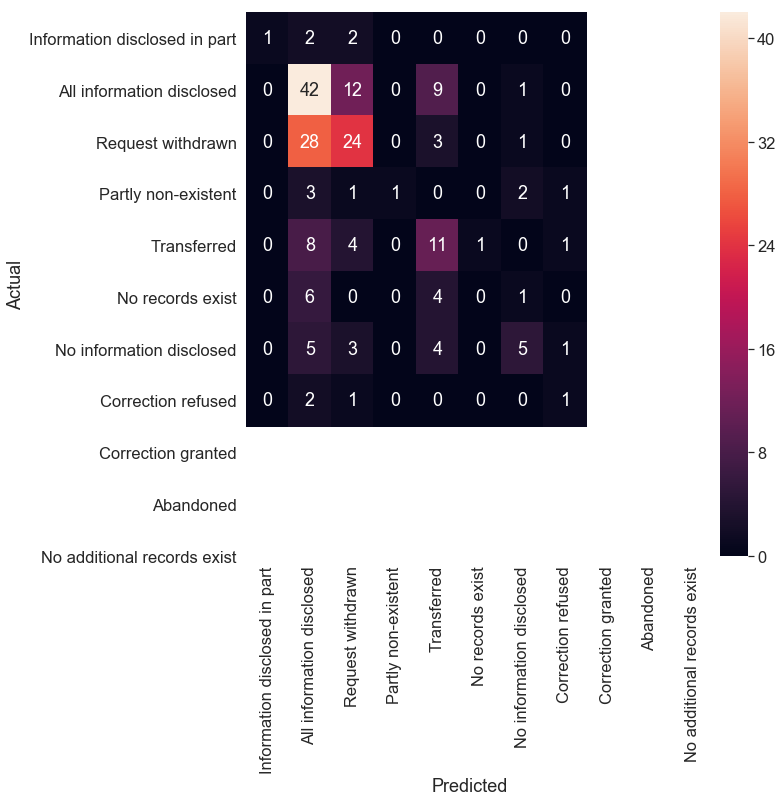

In [203]:
tfidf_conf_mat = confusion_matrix(y1_test, tfidf_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tfidf_conf_mat, annot=True, fmt='d',
            xticklabels=tokenized_adf['Decision'].unique(), yticklabels=tokenized_adf['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [204]:
# If we remove request withdrawn and abandoned - as this depends on the person submitting the request and
# not on whether the requests is approved or not

In [205]:
tokenized_adf_indep = tokenized_adf.copy()

In [206]:
tokenized_adf_indep = tokenized_adf_indep[tokenized_adf_indep.Decision != 'Request withdrawn']

In [207]:
tokenized_adf_indep = tokenized_adf_indep[tokenized_adf_indep.Decision != 'Abandoned']

In [208]:
len(tokenized_adf_indep)

483

In [209]:
len(tokenized_adf)

576

In [210]:
y_i = tokenized_adf_indep['Decision']

In [274]:
X2 = tokenized_adf_indep['Edited_Summary']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_i, test_size=0.33, random_state=2018)

In [275]:
count_pipe.fit(X2_train, y2_train)
count_preds = count_pipe.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, count_preds))


Accuracy: 0.43125


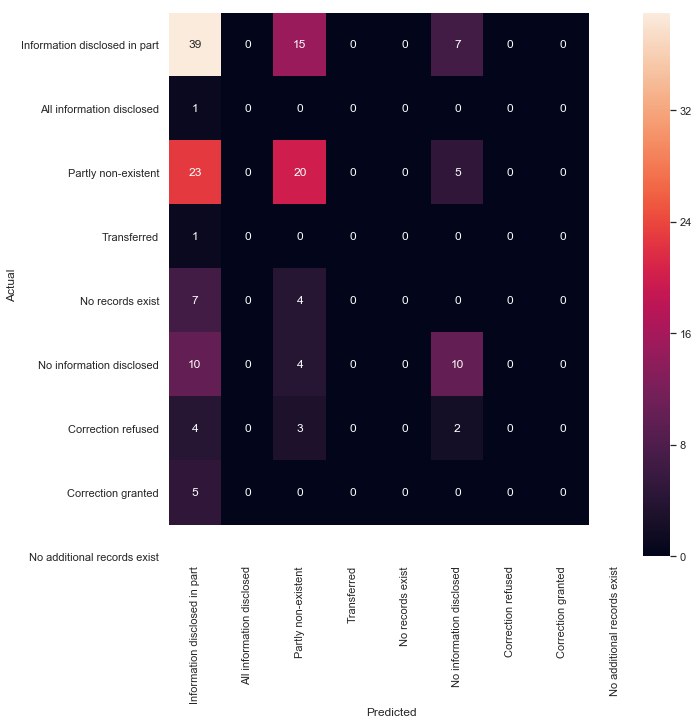

In [276]:
count_conf_mat = confusion_matrix(y2_test, count_preds) 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(count_conf_mat, annot=True, fmt='d',
            xticklabels=tokenized_adf_indep['Decision'].unique(), yticklabels=tokenized_adf_indep['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [277]:
tfidf_pipe.fit(X2_train, y2_train)
tfidf_preds = tfidf_pipe.predict(X2_test)
print("Accuracy:", accuracy_score(y2_test, tfidf_preds))

Accuracy: 0.425


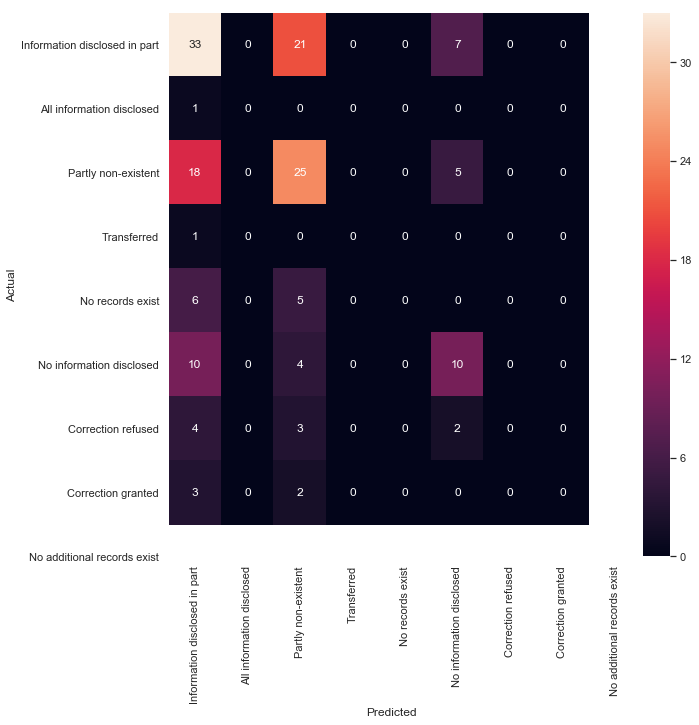

In [278]:
tfidf_conf_mat = confusion_matrix(y2_test, tfidf_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tfidf_conf_mat, annot=True, fmt='d',
            xticklabels=tokenized_adf_indep['Decision'].unique(), yticklabels=tokenized_adf_indep['Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

So, let's reduce the categories to three, all, partly, and no information disclosed. 

All information disclosed (plus correction granted)

Information disclosed in part (plus partly non-existent)

No information disclosed (plus transferred, no records exist, correction refused, no additional records exist, withdrawn, abandoned)

In [218]:
tokenized_adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener years
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge years
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...


In [230]:
tokenized_adf['Sub_Decision'] = tokenized_adf['Decision']

In [231]:
tokenized_adf.head(4)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener years,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge years,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...,All information disclosed


In [232]:
decisions_unique = tokenized_adf['Sub_Decision'].unique()

In [234]:
for decision in decisions_unique:
    print(decision)

Information disclosed in part
All information disclosed
Request withdrawn
Partly non-existent
Transferred
No records exist
No information disclosed
Correction refused
Correction granted
Abandoned
No additional records exist


In [235]:
pos_dec = {'Correction granted'}
part_dec = {'Partly non-existent'}
neg_dec = {'Request withdrawn', 'Transferred', 'No records exist', 'Correction refused', 'Abandoned', 
           'No additional records exist'}

In [236]:
for pos in pos_dec:
    tokenized_adf['Sub_Decision'] = tokenized_adf['Sub_Decision'].str.replace(
    pos,'All information disclosed')

In [237]:
for part in part_dec:
    tokenized_adf['Sub_Decision'] = tokenized_adf['Sub_Decision'].str.replace(
    part,'Information disclosed in part')

In [238]:
for neg in neg_dec:
    tokenized_adf['Sub_Decision'] = tokenized_adf['Sub_Decision'].str.replace(
    neg,'No information disclosed')

In [243]:
tokenized_adf.head(11)

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
0,99001,General,Business,Minutes of Service Delivery Subcommittee of ES...,Information disclosed in part,minutes service delivery subcommittee escac pe...,Information disclosed in part
1,99002,General,Business,Public Health inspection reports for the {loca...,All information disclosed,public health inspection report kitchener years,All information disclosed
2,99003,General,Business,Public Health inspection records for {location...,Information disclosed in part,public health inspection record cambridge years,Information disclosed in part
3,99004,General,Individual,Public Health inspection records for {address ...,All information disclosed,public health inspection record cambridge rela...,All information disclosed
4,99005,General,Business,Vendor list report with total of year-to-date ...,All information disclosed,vendor report total purchase fiscal,All information disclosed
5,99006,Personal,Individual,Public Health inspection file for {name remove...,All information disclosed,public health inspection regard requester dism...,All information disclosed
6,99007,General,Individual,Scope of work and deliverables sections of con...,All information disclosed,scope deliverable section contract region wate...,All information disclosed
7,99008,General,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,number contract dollar contract region waterlo...,No information disclosed
8,99009,Personal,Individual,Public Health inspection report regarding a co...,All information disclosed,public health inspection report regard complai...,All information disclosed
9,99010,General,Business,Phase I environmental site assessment regardin...,Request withdrawn,phase environmental assessment regard sewer,No information disclosed


In [240]:
tokenized_adf['Sub_Decision'].unique()

array(['Information disclosed in part', 'All information disclosed',
       'No information disclosed'], dtype=object)

In [253]:
tokenized_adf[(tokenized_adf['Decision'] == 'Transferred') | 
              (tokenized_adf['Decision'] == 'No records exist')|
              (tokenized_adf['Decision'] == 'Request withdrawn')|
              (tokenized_adf['Decision'] == 'Correction refused')|
              (tokenized_adf['Decision'] == 'Abandoned')|
              (tokenized_adf['Decision'] == 'No additional records exist')
             ]


,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
7,99008,General,Individual,Number of contracts and dollar amount of contr...,Request withdrawn,number contract dollar contract region waterlo...,No information disclosed
9,99010,General,Business,Phase I environmental site assessment regardin...,Request withdrawn,phase environmental assessment regard sewer,No information disclosed
17,99018,General,Business by Agent,"All files relating to tendering, construction,...",Request withdrawn,file relate tender construction administration...,No information disclosed
18,99019,General,Individual,List of all radio frequencies used by Region o...,Transferred,radio frequency region waterloo police departm...,No information disclosed
19,99020,General,Business,Copies of purchase orders for last 12 months i...,Request withdrawn,"copy purchase order month amount 5,000 50,000 ...",No information disclosed
20,99021,Personal,Individual,{Name removed} personnel file for the period 1...,Request withdrawn,personnel period 1990/10/01 1999/10/31,No information disclosed
22,99023,General,Business,"All reports, studies and documents pertaining ...",No records exist,report study document pertain flooding speed r...,No information disclosed
24,99025,General,Individual by Agent,By-Law officer's notes regarding charges again...,No records exist,officer note regard charge second good,No information disclosed
26,99027,Personal,Individual,Complaint regarding alleged fraud accusation m...,Request withdrawn,complaint regard allege fraud accusation septe...,No information disclosed
27,2000001,General,Business by Agent,Correspondence from 1996 to 1997 regarding Sha...,Request withdrawn,correspondence regard shades water treatment p...,No information disclosed


In [255]:
tokenized_adf[(tokenized_adf['Decision'] == 'Partly non-existent')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
10,99011,General,Business,Complete fiscal year end vendor report for yea...,Partly non-existent,complete fiscal vendor report years trial bala...,Information disclosed in part
51,2001006,General,Individual,Location of contaminated sites near {address r...,Partly non-existent,location contaminate site waterloo nature cont...,Information disclosed in part
122,2004008,Personal,Individual,A complete copy of Ontario Works client file f...,Partly non-existent,complete ontario works client,Information disclosed in part
125,2004011,Personal,Individual,Four records of correspondence from Ontario Wo...,Partly non-existent,record correspondence ontario works,Information disclosed in part
128,2004014,General,Individual,"Policies, procedures and by-laws regarding the...",Partly non-existent,policy procedure regard retention waterloo reg...,Information disclosed in part
196,2007015,General,Media,Complaint related to food premise inspection r...,Partly non-existent,complaint relate premise inspection report spe...,Information disclosed in part
218,2008013,General,Individual,Authority to fluoridate water outside of Water...,Partly non-existent,authority fluoridate water outside waterloo,Information disclosed in part
219,2008014,General,Business,Phase I environmental site assessment for {add...,Partly non-existent,phase environmental assessment kitchener,Information disclosed in part
221,2008016,General,Business,Number and type of section 22 orders issued un...,Partly non-existent,number section order issue health protection p...,Information disclosed in part
226,2008021,Personal,Individual by Agent,A complete copy of Ontario Disability Support ...,Partly non-existent,complete ontario disability support program cl...,Information disclosed in part


In [256]:
tokenized_adf[(tokenized_adf['Decision'] == 'Correction granted')]

,Request_Number,Request_Type,Source,Summary_of_Request,Decision,Edited_Summary,Sub_Decision
116,2004002,Correction,Individual,Return of original application from Prenatal S...,Correction granted,return original application prenatal support w...,All information disclosed


In [258]:
tokenized_adf.Sub_Decision.value_counts()

No information disclosed         211
All information disclosed        190
Information disclosed in part    175
Name: Sub_Decision, dtype: int64

In [263]:
columns_sub=[]
for i in range(0,tokenized_adf.Sub_Decision.nunique()):
    columns_sub.append(tokenized_adf.Sub_Decision.unique()[i])

print(len(columns_sub))
print(columns_sub)
print(columns_sub[0])

3
['Information disclosed in part', 'All information disclosed', 'No information disclosed']
Information disclosed in part


In [264]:
tokenized_adf_groupbySubDecision = tokenized_adf.groupby('Sub_Decision').count()[['Source']]

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

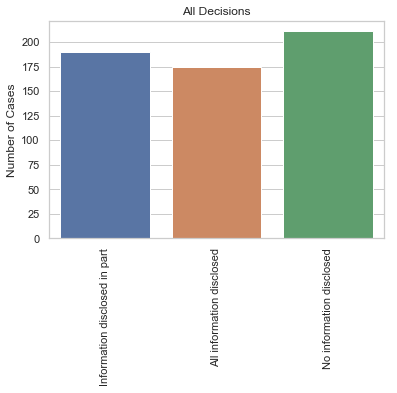

In [266]:
sns.set(style="whitegrid")
ax = sns.barplot(x = columns_sub, y = 'Source', data = tokenized_adf_groupbySubDecision)
ax.set(ylabel = 'Number of Cases', title = 'All Decisions')
plt.xticks(rotation=90)

In [268]:
y_s = tokenized_adf['Sub_Decision']

In [279]:
X_s = tokenized_adf['Edited_Summary']
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.33, random_state=2018)

In [280]:
len(X_s_train), len (y_s_train)

(385, 385)

In [281]:
X_s_train.sample(5)

574    grand river transit video surveillance interse...
158          rabies control investigation regard sustain
327             phase environmental assessment kitchener
317             phase environmental assessment kitchener
399                        bear illness complaint record
Name: Edited_Summary, dtype: object

In [282]:
count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("Accuracy:", accuracy_score(y_s_test, count_preds))


Accuracy: 0.450261780104712


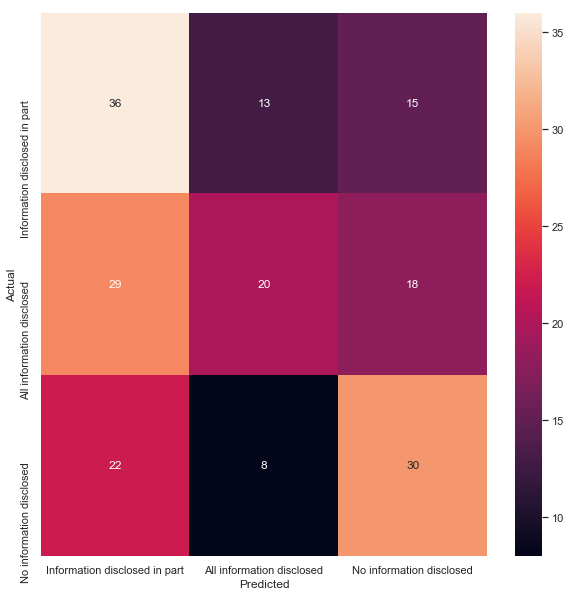

In [283]:
count_conf_mat = confusion_matrix(y_s_test, count_preds) 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(count_conf_mat, annot=True, fmt='d',
            xticklabels=tokenized_adf['Sub_Decision'].unique(), yticklabels=tokenized_adf['Sub_Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [284]:
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("Accuracy:", accuracy_score(y_s_test, tfidf_preds))

Accuracy: 0.47643979057591623


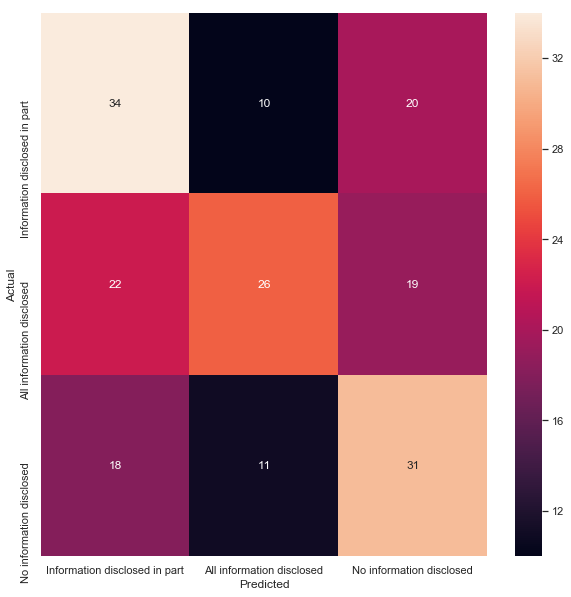

In [287]:
tfidf_conf_mat = confusion_matrix(y_s_test, tfidf_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tfidf_conf_mat, annot=True, fmt='d',
            xticklabels=tokenized_adf['Sub_Decision'].unique(), yticklabels=tokenized_adf['Sub_Decision'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [293]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,4))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,4))
count_clf = LinearSVC()
tfidf_clf = LinearSVC()

In [290]:
count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

In [292]:
count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SVC Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SVC Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

Accuracy count: 0.45549738219895286
Accuracy tfidf: 0.46596858638743455


DecisionTreeClassifier
RandomForestClassifier

In [296]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
count_clf = RandomForestClassifier()
tfidf_clf = RandomForestClassifier()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("RF Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("RF Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Accuracy count: 0.45549738219895286
RF Accuracy tfidf: 0.4607329842931937


/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [297]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
count_clf = DecisionTreeClassifier()
tfidf_clf = DecisionTreeClassifier()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("DT Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("DT Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

DT Accuracy count: 0.4712041884816754
DT Accuracy tfidf: 0.45549738219895286


In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [300]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
count_clf = LogisticRegression()
tfidf_clf = LogisticRegression()

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("LR Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("LR Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bertaerodriguez-milla/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR Accuracy count: 0.450261780104712
LR Accuracy tfidf: 0.4607329842931937


In [307]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
count_clf = KNeighborsClassifier(n_neighbors=1)
tfidf_clf = KNeighborsClassifier(n_neighbors=1)

count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("KN Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("KN Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

KN Accuracy count: 0.418848167539267
KN Accuracy tfidf: 0.43455497382198954


In [308]:
count_vect = CountVectorizer(ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(ngram_range=(1,3))
count_clf = SVC(C=10, gamma = 'scale')
tfidf_clf = SVC(C=10, gamma = 'scale')

count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SVC Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SVC Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

SVC Accuracy count: 0.450261780104712
SVC Accuracy tfidf: 0.36649214659685864


SVC Accuracy count: 0.45549738219895286
SVC Accuracy tfidf: 0.3717277486910995

In [314]:
count_vect = CountVectorizer(ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(ngram_range=(1,3))
count_clf = MultinomialNB()
tfidf_clf = MultinomialNB()

count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("Multinomial Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("Multinomial Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

Multinomial Accuracy count: 0.47643979057591623
Multinomial Accuracy tfidf: 0.45549738219895286


In [317]:
count_vect = CountVectorizer(ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(ngram_range=(1,3))
count_clf = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)
tfidf_clf = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)

count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

count_pipe.fit(X_s_train, y_s_train)
count_preds = count_pipe.predict(X_s_test)
print("SDG Accuracy count:", accuracy_score(y_s_test, count_preds))
tfidf_pipe.fit(X_s_train, y_s_train)
tfidf_preds = tfidf_pipe.predict(X_s_test)
print("SDG Accuracy tfidf:", accuracy_score(y_s_test, tfidf_preds))

SDG Accuracy count: 0.4973821989528796
SDG Accuracy tfidf: 0.4293193717277487


In [323]:
#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(classification_report(y_s_test, count_preds,
                                    target_names=tokenized_adf['Sub_Decision'].unique()))

                               precision    recall  f1-score   support

Information disclosed in part       0.47      0.41      0.44        64
    All information disclosed       0.50      0.52      0.51        67
     No information disclosed       0.52      0.57      0.54        60

                    micro avg       0.50      0.50      0.50       191
                    macro avg       0.50      0.50      0.50       191
                 weighted avg       0.50      0.50      0.50       191



In [364]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              'clf__alpha': (1, 1e-1, 1e-2, 1e-3)
             }
count_clf = MultinomialNB()
count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])
gs_clf = GridSearchCV(count_pipe, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.44363930539813284
clf__alpha: 1
vectorizer__ngram_range: (1, 4)


In [363]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              'clf__alpha': (1, 1e-1, 1e-2, 1e-3)
             }
tfidf_clf = MultinomialNB()
tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])
gs_clf = GridSearchCV(tfidf_pipe, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))


Best score:  0.4545047890151155
clf__alpha: 1
vectorizer__ngram_range: (1, 4)


In [380]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'kernel':('linear', 'rbf')
              #'C':[1, 5]
              #'gamma': [1e-1, 1]
             }
count_clf = svm.SVC(gamma="scale")
count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])
gs_clf = GridSearchCV(count_pipe, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.39221990534448903
vectorizer__ngram_range: (1, 3)


In [377]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'kernel':('linear', 'rbf')
              #'C':[1, 5]
             }
tfidf_clf = svm.SVC(gamma="scale")
tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])
gs_clf = GridSearchCV(tfidf_pipe, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.39221990534448903
vectorizer__ngram_range: (1, 2)


In [409]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'penalty':['elasticnet']
              #'alpha':[10]
              
             }
count_clf = SGDClassifier(loss='hinge', random_state=42, penalty='l2',
                          max_iter=5, tol=None)
count_pipe = Pipeline([
    ('vectorizer', count_vect),
    ('clf', count_clf)
])
gs_clf = GridSearchCV(count_pipe, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.4358812739558909
vectorizer__ngram_range: (1, 3)


In [410]:
parameters = {'vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
              #'penalty':['elasticnet']
              #'alpha':[10]
              
             }
tfidf_clf = SGDClassifier(loss='hinge', random_state=42, penalty='l2',
                          max_iter=5, tol=None)
tfidf_pipe = Pipeline([
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])
gs_clf = GridSearchCV(tfidf_pipe, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(X_s_train, y_s_train)
print("Best score: ", gs_clf.best_score_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

Best score:  0.44630506069546716
vectorizer__ngram_range: (1, 3)
